**First of all, we need to import all the necessary libraries.**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import imblearn
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,plot_roc_curve

In [2]:
df=pd.read_csv('../input/swarm-behaviour-classification/Swarm_Behaviour.csv')

# **Exploratory Data Analysis**

In [3]:
df.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.0,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.0,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.3,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.0,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.0,12,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23309 entries, 0 to 23308
Columns: 2401 entries, x1 to Swarm_Behaviour
dtypes: float64(2001), int64(400)
memory usage: 427.0 MB


In [5]:
df.isna().sum()

x1                 0
y1                 0
xVel1              0
yVel1              0
xA1                0
                  ..
xC200              0
yC200              0
nAC200             0
nS200              0
Swarm_Behaviour    0
Length: 2401, dtype: int64

In [6]:
df.describe()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
count,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,...,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000
mean,104.413631,-73.481853,-0.697607,0.061480,-0.147964,0.152034,-1.055732,-0.731546,-0.034915,0.077123,...,0.086824,-0.126276,0.127497,-1.526260,-0.118891,-0.012388,0.085076,26.433995,2.130679,0.341242
std,843.200079,573.329374,6.427840,7.366739,0.376078,0.588582,26.388570,20.684183,0.559690,0.628478,...,7.683539,0.378830,0.570589,73.903764,7.002853,0.555143,0.614603,34.136098,7.431911,0.474136
min,-1414.140000,-1012.180000,-18.590000,-18.410000,-1.000000,-1.000000,-944.070000,-847.910000,-2.680000,-2.680000,...,-18.440000,-1.040000,-1.000000,-4079.230000,-370.240000,-2.680000,-2.680000,0.000000,0.000000,0.000000
25%,-542.020000,-611.220000,-5.360000,-5.680000,-0.230000,-0.010000,0.000000,0.000000,-0.040000,-0.020000,...,-5.600000,-0.190000,0.000000,0.000000,0.000000,-0.070000,0.000000,2.000000,0.000000,0.000000
50%,145.300000,-157.350000,-0.450000,-1.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
75%,896.200000,425.700000,3.940000,7.260000,0.000000,0.940000,0.000000,0.000000,0.000000,0.020000,...,7.480000,0.000000,0.540000,0.000000,0.000000,0.000000,0.030000,35.000000,1.000000,1.000000
max,1406.080000,1015.800000,18.470000,18.570000,1.000000,1.040000,68.560000,234.740000,2.680000,2.680000,...,18.490000,1.000000,1.040000,255.990000,57.840000,2.680000,2.680000,142.000000,64.000000,1.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Swarm_Behaviour', ylabel='count'>

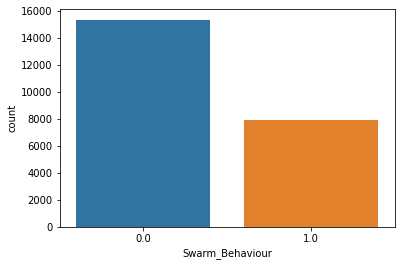

In [7]:

sns.countplot(df["Swarm_Behaviour"])

**the  observation in the first class is higher than the observation in the second classe then there exists an imbalance.Class Imbalance is a common problem in machine learning, especially in classification problems.Imbalance data can hamper our model accuracy big time. so we need to deal with this problem.**

In [8]:
# class count
class_count_0, class_count_1 = df['Swarm_Behaviour'].value_counts()

# Separate class
class_0 = df[df['Swarm_Behaviour'] == 0]
class_1 = df[df['Swarm_Behaviour'] == 1]

# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (15355, 2401)
class 1: (7954, 2401)


# **Resampling Technique**

**A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).**

# **1. Random Under-Sampling**

**Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.But we can remove pertinent information.**


total class of 1 and 0: 0.0    7954
1.0    7954
Name: Swarm_Behaviour, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

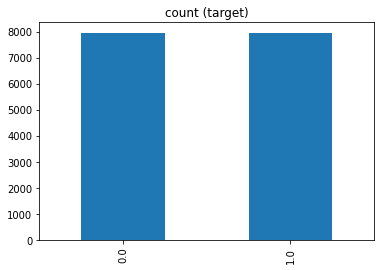

In [9]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",test_under['Swarm_Behaviour'].value_counts())# plot the count after under-sampeling
test_under['Swarm_Behaviour'].value_counts().plot(kind='bar', title='count (target)')

# **2. Random Over-Sampling**

**Oversampling can be defined as adding more copies to the minority class.**

total class of 1 and 0: 0.0    7954
1.0    7954
Name: Swarm_Behaviour, dtype: int64
total class of 1 and 0 after under-sampeling: 1.0    15355
0.0    15355
Name: Swarm_Behaviour, dtype: int64


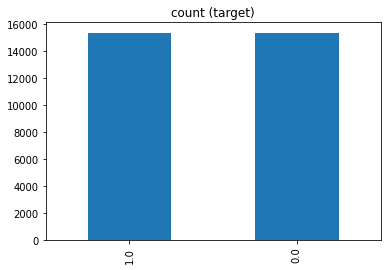

In [10]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_under['Swarm_Behaviour'].value_counts())
# plot the count after under-sampeling
test_over['Swarm_Behaviour'].value_counts().plot(kind='bar', title='count (target)')
print("total class of 1 and 0 after under-sampeling:",test_over['Swarm_Behaviour'].value_counts())

# **3. Random under-sampling with imblearn**

**RandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. Under-sample the majority class(es) by randomly picking samples with or without replacement.**

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = 'Swarm_Behaviour', axis=1)
Y = df['Swarm_Behaviour']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state=2)

In [12]:
# import library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

RandomUnderSampler = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_RandomUnderSampler, y_RandomUnderSampler = RandomUnderSampler.fit_resample(X, Y)

print('original dataset shape:', Counter(X))
print('Resample dataset shape', Counter(y_RandomUnderSampler))

original dataset shape: Counter({'x1': 1, 'y1': 1, 'xVel1': 1, 'yVel1': 1, 'xA1': 1, 'yA1': 1, 'xS1': 1, 'yS1': 1, 'xC1': 1, 'yC1': 1, 'nAC1': 1, 'nS1': 1, 'x2': 1, 'y2': 1, 'xVel2': 1, 'yVel2': 1, 'xA2': 1, 'yA2': 1, 'xS2': 1, 'yS2': 1, 'xC2': 1, 'yC2': 1, 'nAC2': 1, 'nS2': 1, 'x3': 1, 'y3': 1, 'xVel3': 1, 'yVel3': 1, 'xA3': 1, 'yA3': 1, 'xS3': 1, 'yS3': 1, 'xC3': 1, 'yC3': 1, 'nAC3': 1, 'nS3': 1, 'x4': 1, 'y4': 1, 'xVel4': 1, 'yVel4': 1, 'xA4': 1, 'yA4': 1, 'xS4': 1, 'yS4': 1, 'xC4': 1, 'yC4': 1, 'nAC4': 1, 'nS4': 1, 'x5': 1, 'y5': 1, 'xVel5': 1, 'yVel5': 1, 'xA5': 1, 'yA5': 1, 'xS5': 1, 'yS5': 1, 'xC5': 1, 'yC5': 1, 'nAC5': 1, 'nS5': 1, 'x6': 1, 'y6': 1, 'xVel6': 1, 'yVel6': 1, 'xA6': 1, 'yA6': 1, 'xS6': 1, 'yS6': 1, 'xC6': 1, 'yC6': 1, 'nAC6': 1, 'nS6': 1, 'x7': 1, 'y7': 1, 'xVel7': 1, 'yVel7': 1, 'xA7': 1, 'yA7': 1, 'xS7': 1, 'yS7': 1, 'xC7': 1, 'yC7': 1, 'nAC7': 1, 'nS7': 1, 'x8': 1, 'y8': 1, 'xVel8': 1, 'yVel8': 1, 'xA8': 1, 'yA8': 1, 'xS8': 1, 'yS8': 1, 'xC8': 1, 'yC8': 1, 'nAC

# **4. Random over-sampling with imblearn**

**One other way to fight imbalance data is to generate new samples in the minority classes. The most naive strategy is to generate new samples by randomly sampling with replacement of the currently available samples.**

In [13]:
# import library
from imblearn.over_sampling import RandomOverSampler

RandomOverSampler = RandomOverSampler(random_state=42)

# fit predictor and target variable 
x_RandomOverSampler, y_RandomOverSampler = RandomOverSampler.fit_resample(X, Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_RandomOverSampler))

Original dataset shape Counter({0.0: 15355, 1.0: 7954})
Resample dataset shape Counter({0.0: 15355, 1.0: 15355})


# **5. Under-sampling: Tomek links**

**Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.**

In [14]:
# import library
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(X, Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_tl))

Original dataset shape Counter({0.0: 15355, 1.0: 7954})
Resample dataset shape Counter({0.0: 15121, 1.0: 7954})


# **6. Synthetic Minority Oversampling Technique (SMOTE)**

**SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.(NB: this method take a lots of time)** 

**SMOTE algorithm works in 4 simple steps:**

**1. Choose a minority class as the input vector**

**2. Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)**

**3. Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor**

**4. Repeat the steps until data is balanced**

In [15]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0.0: 15355, 1.0: 7954})
Resample dataset shape Counter({0.0: 15355, 1.0: 15355})


# **7. NearMiss**

**NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance, this will make the majority class equal to the minority class.**

In [16]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(X, Y)

print('Original dataset shape:', Counter(Y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0.0: 15355, 1.0: 7954})
Resample dataset shape: Counter({0.0: 7954, 1.0: 7954})


# **8. Change the performance metric**

**Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading.**

**Metrics that can provide better insight are:**

**Confusion Matrix: a table showing correct predictions and types of incorrect predictions.**

**Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.**

**Recall: the number of true positives divided by the number of positive values in the test data. The recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.**

**F1: Score: the weighted average of precision and recall.**

**Area Under ROC Curve (AUROC): AUROC represents the likelihood of your model distinguishing observations from two classes.**

**In other words, if you randomly select one observation from each class, what’s the probability that your model will be able to “rank” them correctly?**

# **9. Penalize Algorithms (Cost-Sensitive Training)**

**The next tactic is to use penalized learning algorithms that increase the cost of classification mistakes on the minority class.**

**A popular algorithm for this technique is Penalized-SVM.**

**During training, we can use the argument class_weight=’balanced’ to penalize mistakes on the minority class by an amount proportional to how under-represented it is.**

**We also want to include the argument probability=True if we want to enable probability estimates for SVM algorithms.**

**Let’s train a model using Penalized-SVM on the original imbalanced dataset:**

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [18]:
# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, Y_train)

svc_predict = svc_model.predict(X_test)# check performance


In [19]:
print('ROC-AUC score:',roc_auc_score(Y_test, svc_predict))
print('Accuracy score:',accuracy_score(Y_test, svc_predict))
print('F1 score:',f1_score(Y_test, svc_predict))

ROC-AUC score: 0.8691602996351446
Accuracy score: 0.8727298727298727
F1 score: 0.8214285714285714


# **10. Change the algorithm**

**While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms, it can be especially beneficial with imbalanced datasets.**

**Decision trees frequently perform well on imbalanced data. In modern machine learning, tree ensembles (Random Forests, Gradient Boosted Trees, etc.) almost always outperform singular decision trees, so we’ll jump right into those:**

**Tree base algorithm work by learning a hierarchy of if/else questions. This can force both classes to be addressed.**

In [20]:
# load library
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(X_train, Y_train)

# predict
rfc_predict = rfc.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(Y_test, rfc_predict))
print('Accuracy score:',accuracy_score(Y_test, rfc_predict))
print('F1 score:',f1_score(Y_test, rfc_predict))

ROCAUC score: 0.8643226414267002
Accuracy score: 0.8748748748748749
F1 score: 0.8192522206155752
